In [145]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Daten entnommen aus https://github.com/LiyingCheng95/IAM

# claim / stance data laden

In [146]:
# Define the path to the IAM directory
IAM_CLAIM_PATH = 'IAM/claims'
IAM_EVIDENCE_PATH = 'IAM/evidence'
IAM_STANCE_PATH = 'IAM/stance'

# List all files in the IAM directory
claim_files = os.listdir(IAM_CLAIM_PATH)
claim_files

['all_claims.txt', 'dev.txt', 'main.py', 'test.txt', 'train.py', 'train.txt']

In [147]:
column_names = ['claim_label', # c: claim, O: non-claim
    'topic_sentence', 
    'claim_candidate_sentence', 
    'article_id',
    'stance_label'] # 1: support, -1: against, 0: no relation/non-claim

data_df = pd.read_csv(os.path.join(IAM_CLAIM_PATH, 'all_claims.txt'), delimiter='\t', names=column_names)
data_df.head()

,claim_label,topic_sentence,claim_candidate_sentence,article_id,stance_label
0,O,Should we abandon the one-child policy,Sex selection,1_1,0
1,O,Should we abandon the one-child policy,Sex selection is the attempt to control the se...,1_1,0
2,O,Should we abandon the one-child policy,"It can be accomplished in several ways, both p...",1_1,0
3,O,Should we abandon the one-child policy,It has been marketed under the title family ba...,1_1,0
4,O,Should we abandon the one-child policy,According to the United Nations Population Fun...,1_1,0


In [148]:
data_df.sample(5, random_state=42)

,claim_label,topic_sentence,claim_candidate_sentence,article_id,stance_label
25170,O,Should you invest in renewable technologies,A study by the University of Texas projected t...,47_9,0
38972,C,Should the death penalty be abolished,"To many economists, then, it follows inexorabl...",68_9,-1
35025,O,Should we cancel the standardized test for uni...,The SAT (formerly standing for the Scholastic ...,62_8,0
59890,O,Should we sympathize with and help professiona...,"This is bad, for we want people to work, not beg.",110_8,0
33446,O,Should we stop the development of the Antarcti...,They explain that St John simply estimated the...,60_10,0


In [149]:
data_df.shape

(69666, 5)

In [150]:
# from ydata_profiling import ProfileReport

# # Generate the profiling report
# profile = ProfileReport(data_df, title="Claim Data Profiling Report", explorative=True)

# # Display the report in notebook
# profile.to_notebook_iframe()

# #save report to html
# profile.to_file("claim_data_profiling_report.html")

In [151]:
for column in data_df.columns:
    #print(f"Column: {column}")
    print(data_df[column].value_counts())
    print("\n")

claim_label
O    64776
C     4890
Name: count, dtype: int64


topic_sentence
Should performance-enhancing drugs be allowed in professional sports?            2090
Should we abandon the one-child policy                                           2049
Will artificial intelligence replace humans                                      1377
Should we support animal rights                                                  1355
Should vaccination be mandatory                                                  1294
                                                                                 ... 
Should commercial advertisements be allowed to be fictitious                      193
Should I return the cultural property in the museum to its original home?         188
Should college students be encouraged to start their own businesses               134
Should we unify the national propositions of the college entrance examination     111
Should I ban cosmetic surgery?                                 

## article_id

In [152]:
# splot the article_id column into article_id and article_number
data_df['article_id_1st'] = data_df['article_id'].str.split('_', expand=True)[0]
data_df['article_id_2nd'] = data_df['article_id'].str.split('_', expand=True)[1]
#data_df['article_id_1st'] = data_df['article_id'].astype(int)
data_df.sample(5, random_state=42)

,claim_label,topic_sentence,claim_candidate_sentence,article_id,stance_label,article_id_1st,article_id_2nd
25170,O,Should you invest in renewable technologies,A study by the University of Texas projected t...,47_9,0,47,9
38972,C,Should the death penalty be abolished,"To many economists, then, it follows inexorabl...",68_9,-1,68,9
35025,O,Should we cancel the standardized test for uni...,The SAT (formerly standing for the Scholastic ...,62_8,0,62,8
59890,O,Should we sympathize with and help professiona...,"This is bad, for we want people to work, not beg.",110_8,0,110,8
33446,O,Should we stop the development of the Antarcti...,They explain that St John simply estimated the...,60_10,0,60,10


In [153]:
# gruppiert nacht article_id_1st
data_df["article_id_1st"].value_counts(sort=False)

article_id_1st
1      2049
3       901
4      1184
5      1377
8       679
       ... 
120     986
121     745
122     777
123     950
124     566
Name: count, Length: 100, dtype: int64

In [154]:
# list topic_sentence and get the unique article_ids. Result topic sentence and article_id into separate columns from dataframe
topic_sentence_df = data_df[['topic_sentence', 'article_id_1st']].drop_duplicates()
topic_sentence_df#.head()


,topic_sentence,article_id_1st
0,Should we abandon the one-child policy,1
2049,Should we fight for the Olympics?,3
2950,Should we promote social networks,4
4134,Will artificial intelligence replace humans,5
5511,Should we eliminate traditional universities?,8
...,...,...
65642,Should intellectual property rights be abolished,120
66628,Should we promote the use of wind energy,121
67373,Should we protect endangered animals?,122
68150,Should we ban unsustainable logging,123


<Axes: ylabel='topic_sentence'>

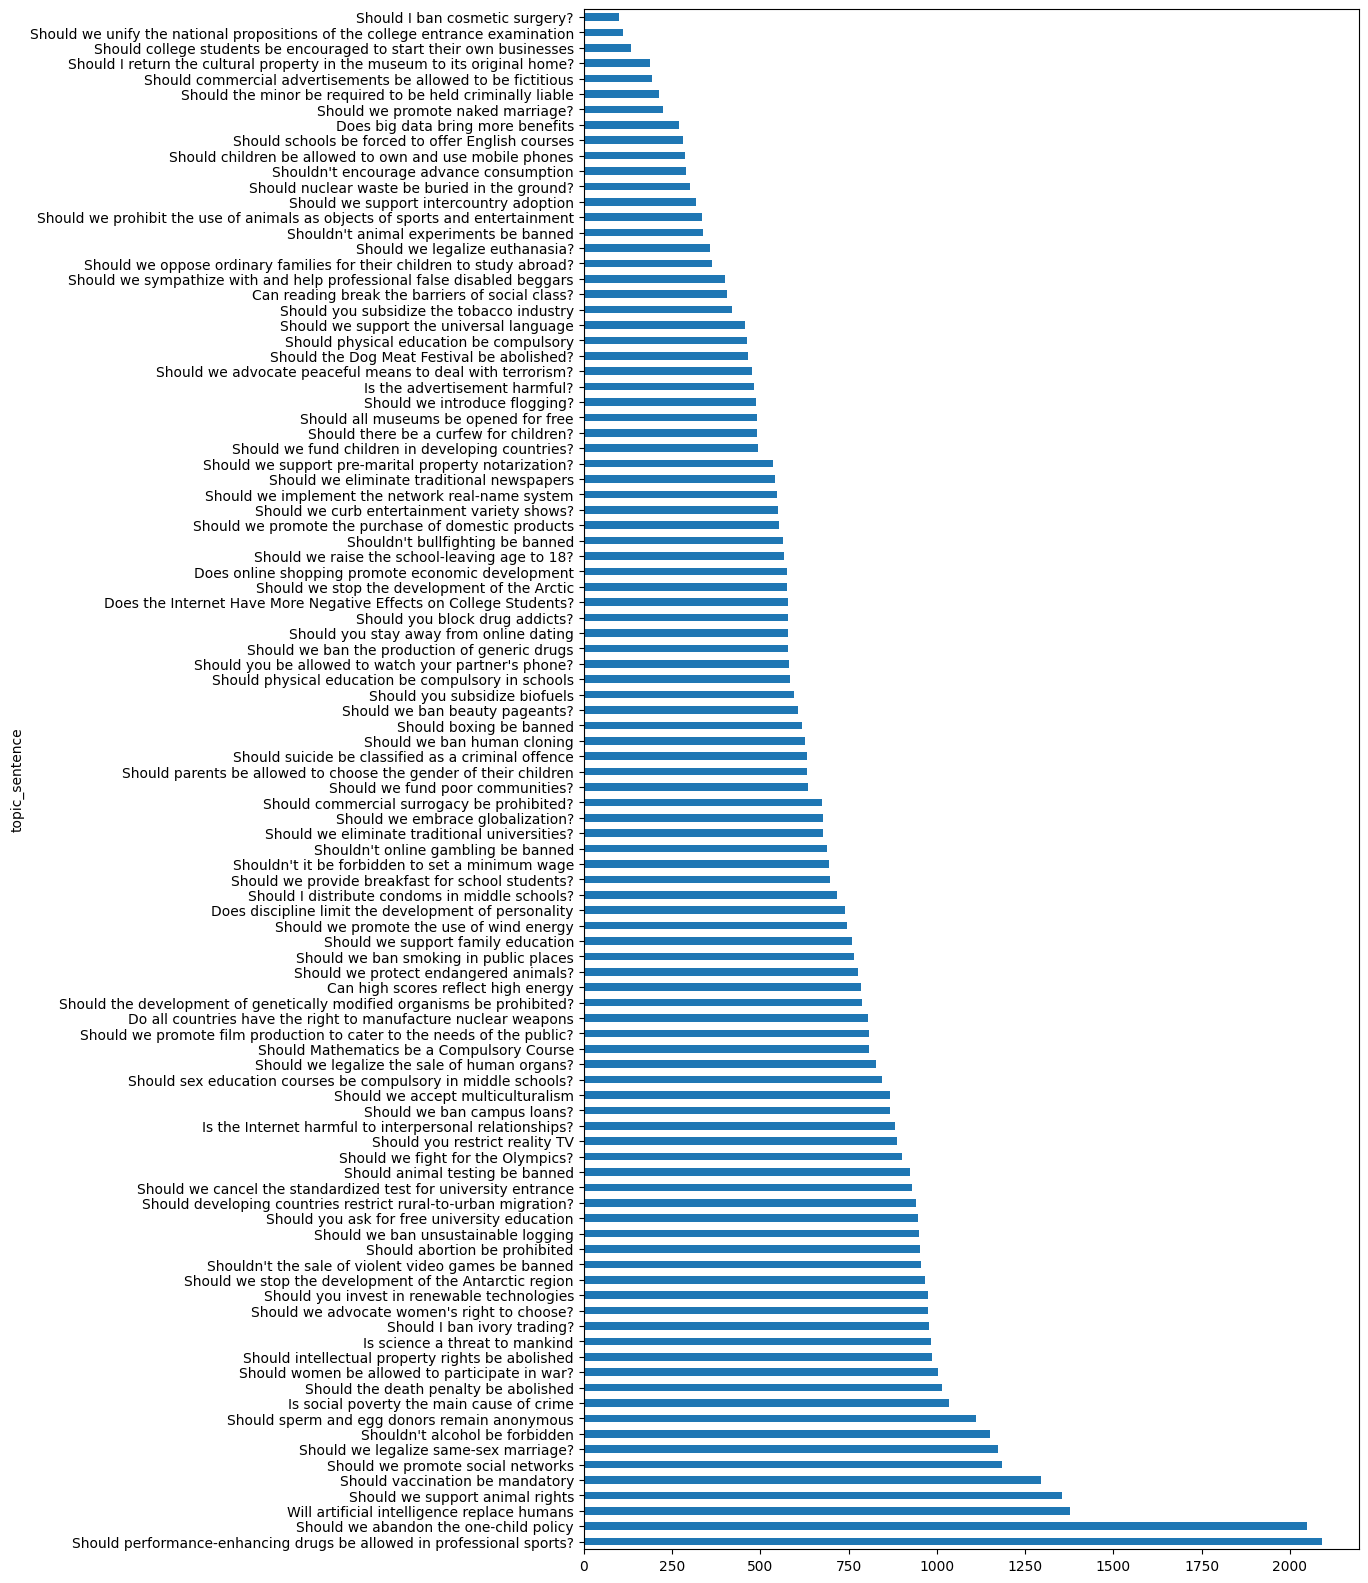

In [155]:
# plot as horizontal bar chart
data_df["topic_sentence"].value_counts().plot(kind='barh', figsize=(10, 20))

jeder Artikel hat eine eindeutige ID, wobei die erste Ziffer die Kategorie des Artikels angibt. Die Kategorien sind wie folgt:

noch zusammenzutragen

In [156]:
# alle zeilen mit article_id_1st == 1
aricle1_df = data_df[data_df["article_id_1st"] == "3"]
aricle1_df["topic_sentence"].value_counts(sort=False)
#aricle1_df["article_id_2nd"].value_counts(sort=False).plot(kind='bar')
#data_df.groupby(["article_id_1st", "article_id_2nd"]).size()

topic_sentence
Should we fight for the Olympics?    901
Name: count, dtype: int64

In [157]:
# alle zeilen mit article_id_1st == 2
aricle1_df = data_df[data_df["article_id_1st"] == "2"]
aricle1_df["topic_sentence"].value_counts(sort=False)

Series([], Name: count, dtype: int64)

In [158]:
# gruppiert nacht article_id_1st
data_df["article_id_2nd"].value_counts(sort=False)

article_id_2nd
1     7568
2     7181
3     6023
4     6536
5     7088
6     5911
7     6133
8     5522
9     5698
10    6251
11    2217
12    1338
13     796
14     857
15     481
16      66
Name: count, dtype: int64

## label distribution

<Axes: title={'center': 'Claim Label Distribution'}, xlabel='claim_label'>

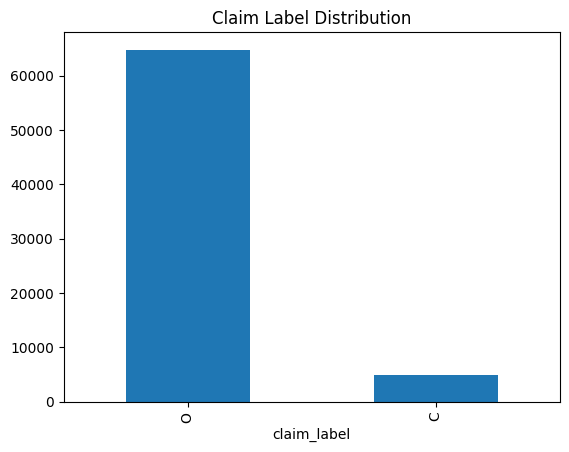

In [159]:
data_df['claim_label'].value_counts().plot(kind='bar', title='Claim Label Distribution')

<Axes: title={'center': 'Claim Label Distribution'}, xlabel='stance_label'>

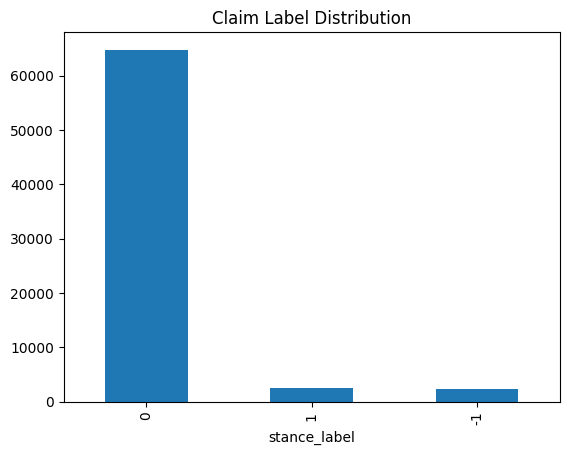

In [160]:
data_df['stance_label'].value_counts().plot(kind='bar', title='Claim Label Distribution')

In [161]:
value_counts = data_df['claim_candidate_sentence'].value_counts()
filtered_value_counts = value_counts[value_counts > 5]
filtered_value_counts

claim_candidate_sentence
[citation needed]                                                                                 160
1                                                                                                  49
2                                                                                                  49
3                                                                                                  48
History                                                                                            46
---                                                                                                37
4                                                                                                  36
United States                                                                                      32
.                                                                                                  31
5                                                        

In [162]:
filtered_value_counts.index

Index(['[citation needed]', '1', '2', '3', 'History', '---', '4',
       'United States', '.', '5', '“', '6', '”', '...', 'History.',
       'Criticism', 'United Kingdom', '7', 'Overview', 'No', 'Advertising',
       'COUNTERPOINT', '8', 'Education', 'Public opinion', 'Yes', 'Background',
       'Australia', '#NAME?', 'Big data', 'Europe', 'Causes', 'Animal rights',
       'Advantages', 'Effects',
       'Its everybody bro with the disney channel flow 5 mill on youtube who the hell are frickin you.',
       'Canada', 'Animal testing', 'vte', 'POINT', 'Criticisms',
       'Genetically modified food controversies', 'Disadvantages', 'Africa',
       'Euthanasia', 'China', 'Reality television', 'Introduction', 'Legality',
       'Cons', 'Pros', '9', 'Economics'],
      dtype='object', name='claim_candidate_sentence')

# Argumentativen Text extrahieren
Hierzu alle Sätze mit claim_label = C extrahieren.

In [163]:
claim_df = data_df[data_df['claim_label'] == 'C']
claim_df.shape

(4890, 7)

In [164]:
len(claim_df["article_id"].unique())

814

In [165]:
claim_df.sample(5, random_state=42)

,claim_label,topic_sentence,claim_candidate_sentence,article_id,stance_label,article_id_1st,article_id_2nd
2606,C,Should we fight for the Olympics?,The city aspired to use the Games to help reco...,3_9,1,3,9
2187,C,Should we fight for the Olympics?,Hosting the Olympics can place a real strain o...,3_3,-1,3,3
31741,C,Should we legalize the sale of human organs?,Legalizing organ sales would create this unwan...,58_3,-1,58,3
68190,C,Should we ban unsustainable logging,Environmental groups criticize clear-cutting a...,123_1,1,123,1
39935,C,Should vaccination be mandatory,CON: Most diseases that vaccines target are re...,70_5,-1,70,5


In [228]:
# Create a dictionary with claim sentences and their corresponding stance labels
claim_df.loc[:, 'sentence_stance_dict'] = claim_df.apply(lambda row: {"sentence": row['claim_candidate_sentence'],
                                                                      "stance_label": row['stance_label']}, axis=1)

# create two new rows that contain the count of the stance labels
claim_df.loc[:, 'support_count'] = claim_df['stance_label'].apply(lambda x: 1 if x == 1 else 0)
claim_df.loc[:, 'against_count'] = claim_df['stance_label'].apply(lambda x: 1 if x == -1 else 0)

claim_df


,claim_label,topic_sentence,claim_candidate_sentence,article_id,stance_label,article_id_1st,article_id_2nd,sentence_stance_dict,support_count,against_count
18,C,Should we abandon the one-child policy,A 2009 study at the University of Ulster found...,1_1,1,1,1,{'sentence': 'A 2009 study at the University o...,1,0
22,C,Should we abandon the one-child policy,The one child policy in China has contributed ...,1_1,1,1,1,{'sentence': 'The one child policy in China ha...,1,0
33,C,Should we abandon the one-child policy,"In China, the one child policy has contributed...",1_1,1,1,1,"{'sentence': 'In China, the one child policy h...",1,0
57,C,Should we abandon the one-child policy,China's 'one child family' policy is considere...,1_1,1,1,1,{'sentence': 'China's 'one child family' polic...,1,0
216,C,Should we abandon the one-child policy,Advantages cited of having an only child are t...,1_3,-1,1,3,{'sentence': 'Advantages cited of having an on...,0,1
...,...,...,...,...,...,...,...,...,...,...
69591,C,Should we raise the school-leaving age to 18?,Though the study shows demonstrated improvemen...,124_9,-1,124,9,{'sentence': 'Though the study shows demonstra...,0,1
69613,C,Should we raise the school-leaving age to 18?,It can change a country’s fortune.,124_10,1,124,10,{'sentence': 'It can change a country’s fortun...,1,0
69625,C,Should we raise the school-leaving age to 18?,"First, students will be equipped with enough e...",124_10,1,124,10,"{'sentence': 'First, students will be equipped...",1,0
69628,C,Should we raise the school-leaving age to 18?,"In fact, many young individuals dropping out o...",124_10,1,124,10,"{'sentence': 'In fact, many young individuals ...",1,0


<Axes: title={'center': 'Claim Stance Label Distribution'}, xlabel='stance_label'>

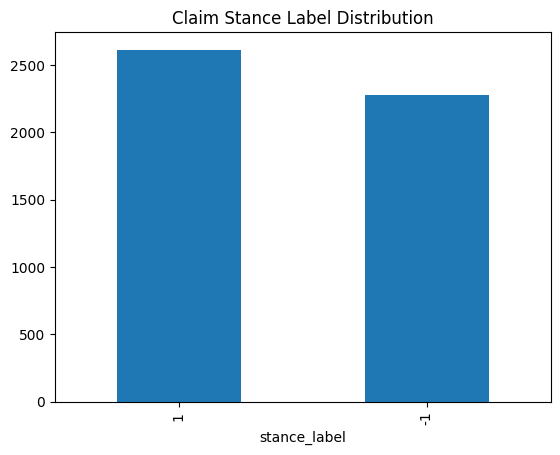

In [229]:
claim_df['stance_label'].value_counts().plot(kind='bar', title='Claim Stance Label Distribution')

# Sätze zu Artikeln zusammenfügen

In [230]:
import re

# Group by article_id and concatenate the sentences
full_articles = data_df.groupby('article_id')['claim_candidate_sentence'].apply(lambda x: '. '.join(map(str, x))).reset_index() #Sätze mit Punkt getrennt zusammenfügen


def clean_text(text):
    """
    Clean the text by replacing multiple dots with a single dot and question marks followed by dots with a single question mark.
    """
    text = re.sub(r'\.\.+', '.', text)  # Replace multiple dots with a single dot
    text = re.sub(r'\?\.+', '?', text)  # Replace question mark followed by dots with a single question mark
    text = re.sub(r'\!\.+', '!', text)  # Replace exclamation mark followed by dots with a single exclamation mark
    return text

full_articles['claim_candidate_sentence'] = full_articles['claim_candidate_sentence'].apply(clean_text)

# rename the column claim canditate sentence to full article
full_articles.rename(columns={'claim_candidate_sentence': 'full_article'}, inplace=True)

# Display the first few full articles
full_articles.head()

,article_id,full_article
0,100_1,Reality television. Reality television is a ge...
1,100_10,Advantages and Disadvantages of Reality Shows....
2,100_11,Kids’ reality shows – should they be banned or...
3,100_12,Pros and cons of reality TV shows. ARGUMENTS F...
4,100_13,Essay on positive and negative effects of real...


In [231]:
full_articles.shape

(1010, 2)

<Axes: title={'center': 'Article Length Distribution'}, ylabel='Frequency'>

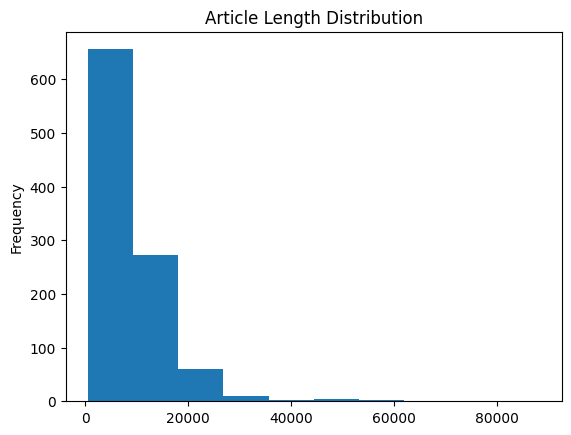

In [232]:
full_articles['full_article'].str.len().plot(kind='hist', title='Article Length Distribution')

In [233]:
# Beispieltext anzeigen
full_articles['full_article'].iloc[0]

"Reality television. Reality television is a genre of television programming that documents purportedly unscripted real-life situations, often starring unknown individuals rather than professional actors. Reality television came to prominence in the late 1990s and the early 2000s with the global successes of the series Survivor, Idols, and Big Brother, all of which became global franchises [ref]. Reality television shows tend to be interspersed with confessionals, short interview segments in which cast members reflect on or provide context for the events being depicted on-screen. Competition-based reality shows typically feature gradual elimination of participants, either by a panel of judges or by the viewership of the show. Documentaries, television news, sports television, talk shows, and traditional game shows are generally not classified as reality television. Some genres of television programming that predate the reality television boom have been retroactively classified as reali

In [241]:
aggregation_dict = {
    'sentence_stance_dict': lambda x: list(x),
    'support_count': 'sum',
    'against_count': 'sum'
}
# gruppiert nach article_id und wendet die aggregation_dict auf die gruppierten Daten an
grouped_sentence_stance_dict = claim_df.groupby('article_id').agg(aggregation_dict).reset_index()
grouped_sentence_stance_dict

,article_id,sentence_stance_dict,support_count,against_count
0,100_1,[{'sentence': 'Other criticisms of reality tel...,3,0
1,100_10,[{'sentence': 'Another benefit of reality show...,3,2
2,100_11,[{'sentence': 'While film fraternity is divide...,3,0
3,100_12,[{'sentence': 'They teach us something about h...,3,7
4,100_13,[{'sentence': 'They have contributed significa...,3,4
...,...,...,...,...
809,9_5,[{'sentence': 'Print newspapers are dying fast...,5,0
810,9_6,[{'sentence': 'Print is more satisfying for re...,0,10
811,9_7,"[{'sentence': 'Additionally, e-readers allow r...",2,4
812,9_8,[{'sentence': 'In recent years newspaper’s wee...,4,0


<Axes: xlabel='article_id'>

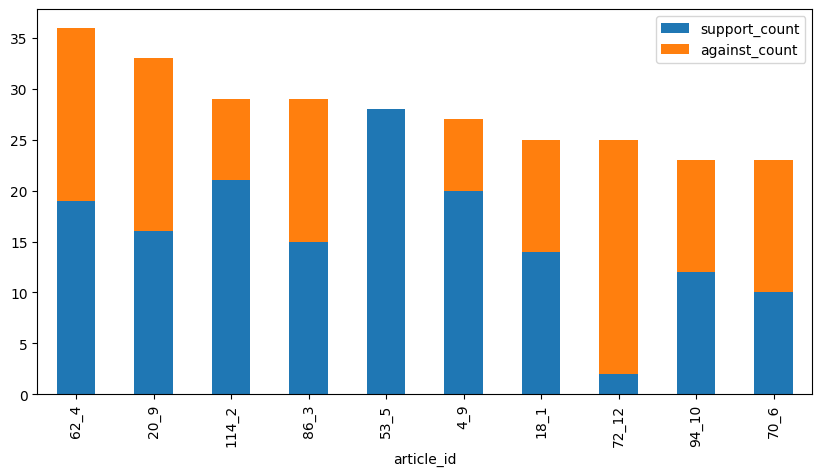

In [240]:
df = grouped_sentence_stance_dict["sentence_stance_dict"].iloc[1]
df = pd.DataFrame(df)
df

,sentence,stance_label
0,Same-sex couples should have access to the sam...,1
1,"Official unions between same-sex couples, indi...",1
2,Gay marriage is protected by the US Constituti...,1
3,The US Supreme Court ruled 7-2 in the 1974 cas...,1
4,Marriage is an internationally recognized huma...,1
5,Non-discrimination on grounds of sexual orient...,1
6,Same-sex marriage is a civil right.,1
7,Gay marriages can bring financial gain to fede...,1
8,Gay couples make good parents.,1
9,Gay marriage bans cause humiliation and uncert...,-1


In [244]:
merged_df = pd.merge(full_articles, grouped_sentence_stance_dict, on='article_id')
#merged_df.rename(columns={'claim_candidate_sentence': 'claim_sentences'}, inplace=True)

merged_df["#claims"] = merged_df["sentence_stance_dict"].apply(len)

merged_df = merged_df.sort_values(by="#claims", ascending=False)
merged_df

,article_id,full_article,sentence_stance_dict,support_count,against_count,#claims
553,62_4,Standardized test. A standardized test is a te...,[{'sentence': 'Because everyone gets the same ...,19,17,36
259,20_9,Should Gay Marriage Be Legal? Denying some peo...,[{'sentence': 'Same-sex couples should have ac...,16,17,33
93,114_2,Surrogacy. Ethical issues. Numerous ethical qu...,[{'sentence': 'Numerous ethical questions have...,21,8,29
672,86_3,Minimum wage. Debate over consequences. Minimu...,[{'sentence': 'Improves functioning of the low...,15,14,29
457,53_5,Mathematics is important. Introduction and gen...,"[{'sentence': 'Mathematics is important', 'sta...",28,0,28
...,...,...,...,...,...,...
411,49_9,'Museums should be accessible': the backlash t...,[{'sentence': '“In every society and throughou...,0,1,1
423,50_1,Boxing. Boxing is a combat sport in which two ...,[{'sentence': 'In Ancient Greece boxing was a ...,0,1,1
426,50_4,Chronic traumatic encephalopathy. Chronic trau...,[{'sentence': 'Because of the concern that box...,1,0,1
439,51_9,5 Reasons Why People Love Imported Products. C...,[{'sentence': 'We buy foreign branded products...,1,0,1


<Axes: xlabel='article_id'>

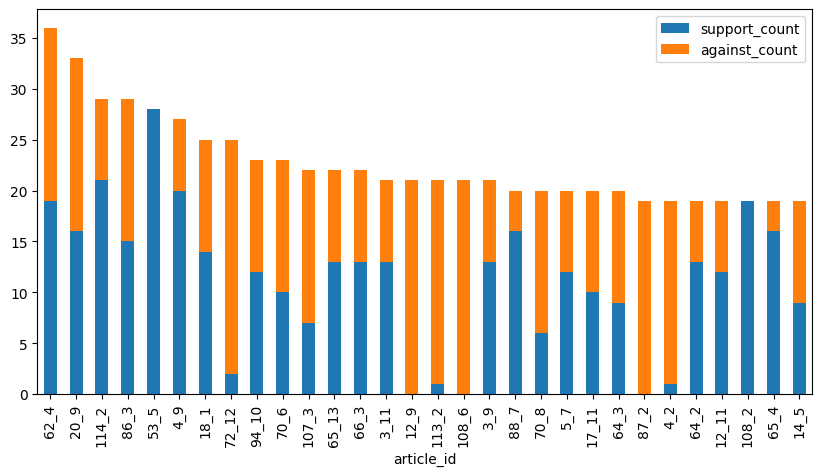

In [247]:
# plot the stance labels for the first ten articles as a stacked bar chart
merged_df.head(30).plot(x='article_id', y=['support_count', 'against_count'], kind='bar', stacked=True, figsize=(10, 5))

In [252]:
# print for one example the full article and than list die claim sentence with the stance labels
example = -1

print(f"TEXT:\n {merged_df['full_article'].iloc[example]}\n")

for claim in merged_df['sentence_stance_dict'].iloc[example]:
    print(f"sentence: {claim['sentence']}")
    print(f"stance_label: {claim['stance_label']}")

TEXT:
 How To Help The Poor Without Subsidizing The Rich. If you are a high net worth individual you probably already know about it. A seminar on the subject at Manhattan’s Harvard Club attracted financial advisors to some of Americas richest dynasties – including the Pritzker and Soros families. A Las Vegas meeting on the subject was organized by former White House aide Anthony Scaramucci and attracted such attendees as Mark Cuban, the billionaire owner of the Dallas Mavericks, and former New Jersey governor Chris Christie. It has spurred the Swiss bank UBS to create a fund for its “ultra high net worth” clients – people who have at least $50 million in investable assets. So, what’s all the excitement about? They are called OZs, or Opportunity Zones. They are the hottest investment opportunity around, and they were created by a mere 8 pages in the 185-page tax reform bill the Republicans passed in 2017. In theory, the idea was to provide capital to revitalize the urban areas that Pres

In [255]:
# test if the sentence is in the full article
example = -1
sentence = merged_df['sentence_stance_dict'].iloc[example][0]['sentence']
full_article = merged_df['full_article'].iloc[example]

sentence in full_article

True